In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
fish = pd.read_csv("./Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# 아주 큰 농어?

In [14]:
perch_length = fish["Length2"][fish["Species"] == "Perch"].to_numpy()
perch_weight = fish["Weight"][fish["Species"] == "Perch"].to_numpy()
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


In [16]:
train_data, test_data, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_data, test_data = train_data.reshape(-1, 1), test_data.reshape(-1, 1)
print(train_data.shape, test_data.shape)

(42, 1) (14, 1)


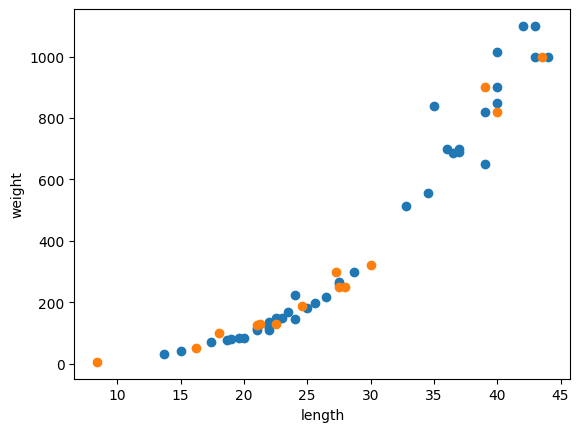

In [23]:
plt.scatter(train_data[:], train_target)
plt.scatter(test_data[:], test_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [18]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3

knr.fit(train_data, train_target)
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))

0.9804899950518966
0.9746459963987609


In [30]:
print(knr.predict([[50]])) # 실제 농어 50cm는 1.5kg 정도임

[1033.33333333]


길이 50cm 농어를 포함한 산점도 그래프

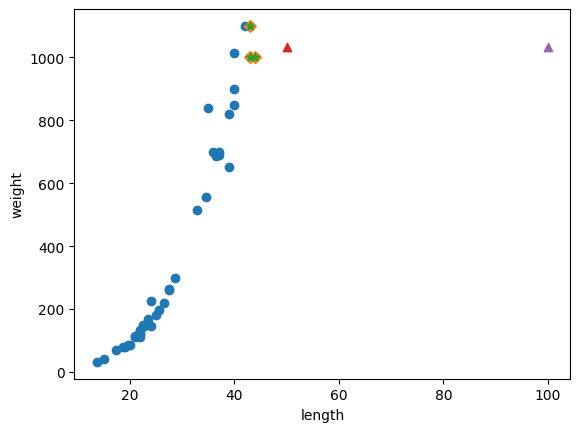

[[6. 7. 7.]]


In [39]:
distance_50, indexes_50 = knr.kneighbors([[50]])
distance_100, indexes_100 = knr.kneighbors([[100]])

plt.scatter(train_data, train_target)
plt.scatter(train_data[indexes_50], train_target[indexes_50], marker = "D")
plt.scatter(train_data[indexes_100], train_target[indexes_100], marker = "*")
plt.scatter(50, 1033, marker = "^")
plt.scatter(100, 1033, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()
print(distance_50)

훈련 데이터 중 가장 큰 길이가 44cm 정도로 보인다.   
44보다 큰 농어의 이웃을 확인해보자   
* KNR 알고리즘은 학습 데이터보다 큰 값이 들어온다면 정확한 결과를 예측하기 힘듦

In [42]:
def P(n):
  distance, indexes = knr.kneighbors([[n]])
  print(np.mean(train_target[indexes]), indexes)
P(25)
P(44)
P(50)
P(100)

200.66666666666666 [[ 5 39 12]]
1033.3333333333333 [[34  8 14]]
1033.3333333333333 [[34  8 14]]
1033.3333333333333 [[34  8 14]]


# K-최근접 이웃 알고리즘보단 선형회귀

In [49]:
LR = LinearRegression()

LR.fit(train_data, train_target)
print(LR.score(train_data, train_target))
print(LR.score(test_data, test_target)) # 과소 적합
print(LR.predict([[50]]))

# 절편과 기울기
print("기울기, 가중치 :", *LR.coef_)
print("절편, 편향 :", LR.intercept_)

0.939846333997604
0.8247503123313558
[1241.83860323]
기울기, 가중치 : 39.0171449636302
절편, 편향 : -709.0186449535477


In [ ]:
# plt.scatter(train_data, train_target)
print()

### 모델기반 학습과 사례기반 학습
모델기반 학습
 * 훈련 과정에서 최적의 모델 파라미터를 찾는 학습법
 * 모델 파라미터 : coef_, intercept_

사례기반 학습
 * k 최근접 이웃 알고리즘은 모델 파라미터 X
 * 훈련셋을 저장하는 것이 훈련의 전부

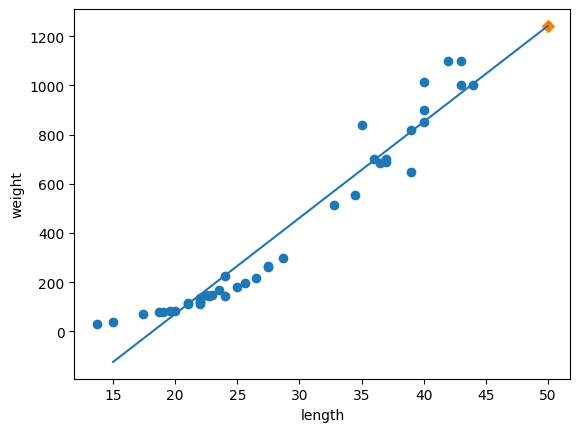

In [50]:
plt.scatter(train_data, train_target)
plt.plot([15, 50], [15 * LR.coef_ + LR.intercept_, 50 * LR.coef_ + LR.intercept_])
plt.scatter(50, LR.predict([[50]]), marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

산점도를 보면 곡선에 가깝다.   
작은 크기의 농어가 입력되면 음수 결괏값이 나올 수도 있음

## 다항 회귀
 * 다항식을 사용한 선형회귀
 * 곡선 그래프를 그린다.

In [59]:
train_poly = np.column_stack((train_data ** 2, train_data))
test_poly = np.column_stack((test_data ** 2, test_data))
print(train_poly.shape, test_poly.shape)
print(train_poly[:5])

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]


In [57]:
LR2 = LinearRegression()
LR2.fit(train_poly, train_target)

# 길이가 50cm인 농어 예측
print(LR2.predict([[50**2, 50]]))

# 길이가 1m인 농어 예측
print(LR2.predict([[100**2, 100]]))

[1573.98423528]
[8103.57880667]


가중치, 절편 값 확인

In [58]:
print(LR2.coef_, LR2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


직선 그리기

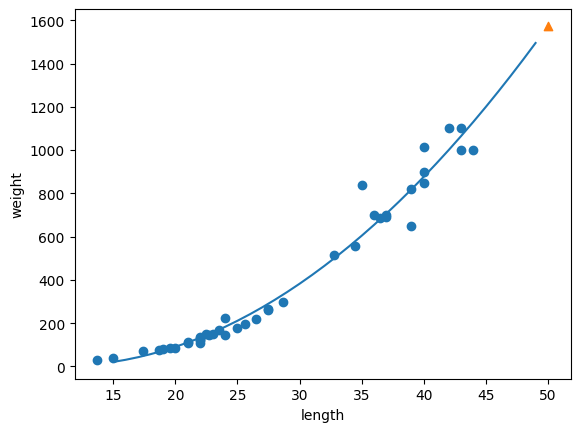

In [64]:
x2, x1, b = *LR2.coef_, LR2.intercept_
point = np.arange(15, 50)

plt.scatter(train_data, train_target)
plt.plot(point, x2 * point ** 2 + x1 * point + b)
plt.scatter(50, *LR2.predict([[50**2, 50]]), marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

R<sup>2</sup> 결과 확인

In [65]:
print(LR2.score(train_poly, train_target))
print(LR2.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


과소적합..